In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# STYLE FOR PLOTS
sns.set_style('ticks') 

## The below code contains graphs of the Google Drive folder **03.Data Analysis/Sb3 Files**

In [26]:
df_1 = "./main.csv" # SB3 files-1
dwes = "./test_openpyxl.csv"

df_drscratch = pd.read_csv(df_1)
df_dwes =  pd.read_csv(dwes)

# Dr. Scratch METRICS

['Abstraction', 'Parallelism', 'LogicalThinking', 'Synchronization', 'FlowControl', 'UserInteractivity', 'DataRepresentation', 'CodeOrganization']


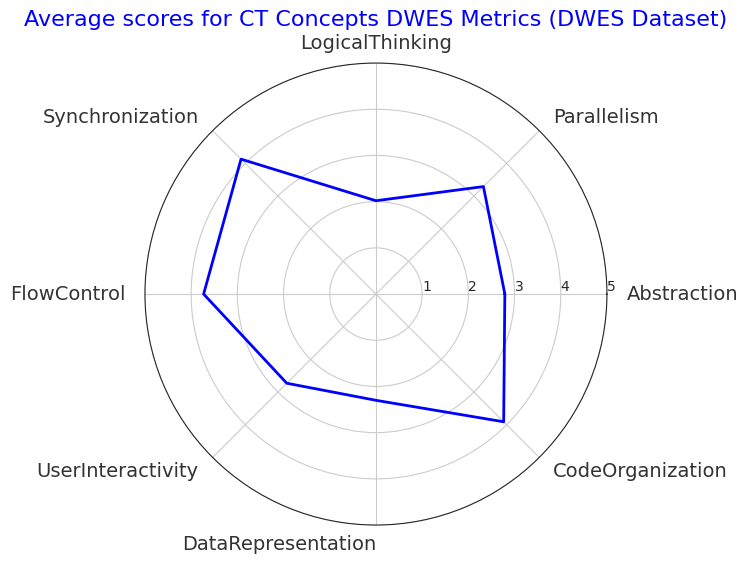

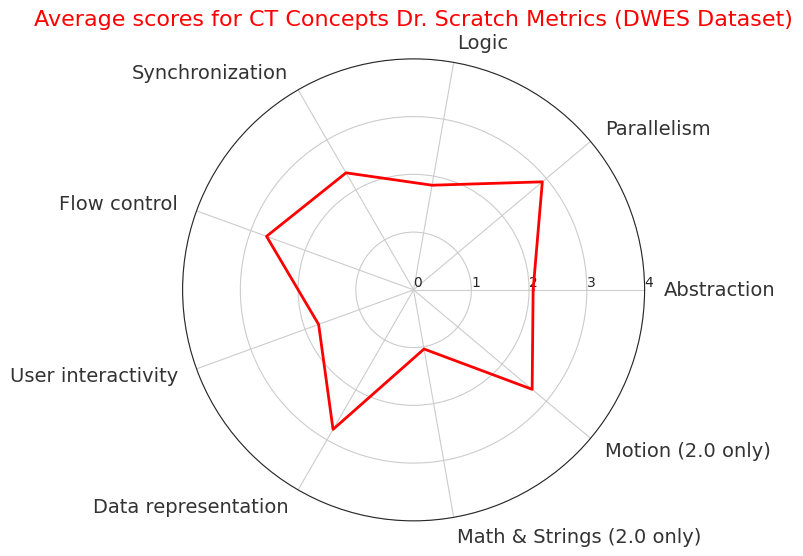

In [85]:
def graph_spider_dwes(df, title, color):
    # DATA PREPROCESSING
    dims = df.iloc[:, 1:9]
    dims_names = dims.columns.tolist() 
    print(dims_names)
    # Convert text values to numeric, removing NaNs
    dim_means = dims.apply(lambda x: pd.to_numeric(x, errors='coerce')).mean()
    dim_means = [round(n, 2) for n in dim_means if pd.notna(n)]
    
    
    # ADAPTIONS TO GRAPH NAMES
    cat = dims_names
    val = dim_means
    
    # GRAPH
    num_vars = len(cat)
    angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
    angles += angles[:1]
    val += val[:1]
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, val, color=color, linewidth=2)  
    ax.set_rlabel_position(0)  
    
    # DESIGN
    plt.title(f"Average scores for CT Concepts {title} (DWES Dataset)", fontsize=16, color=color)
    plt.ylim(0,5)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(dims)

     # Adjusting dimension labels (make sure it matches the actual dimensions)
    dims_names = ['Abstraction', 'Parallelism', 'LogicalThinking', 'Synchronization', 
                  'FlowControl', 'UserInteractivity', 'DataRepresentation', 'CodeOrganization']
    
    ax.set_xticklabels(dims_names, fontsize=14, color='#333333', fontweight='light')
    
    # Adjust label alignment and rotation for readability
    for label, angle in zip(ax.get_xticklabels(), angles):
        dim_name = label.get_text()
        x, y = label.get_position()  # Obtener la posición actual
        if dim_name in ["Parallelism", "Abstraction", "CodeOrganization"]:
            label.set_horizontalalignment('left')
            label.set_position((x + 0.5, y))  # Ajusta el valor según necesites
        elif dim_name in ["Synchronization", "FlowControl", "UserInteractivity",  "DataRepresentation"]:
            label.set_horizontalalignment('right')
            label.set_position((x - 0.1, y))  # Ajusta el valor según necesites
        # Rotar las etiquetas ligeramente para mayor legibilidad
        label.set_rotation(angle * 180 / np.pi)
        label.set_verticalalignment('center')
    
    
    
    # ADJUST DESIGN
    
    # SHOW GRAPH
    plt.show()

def graph_spider_dr_scratch(df, title, color):
    # DATA PREPROCESSING
    dims = df.iloc[:, 3:12]
    dims_names = dims.columns.tolist() 
    # Convert text values to numeric, removing NaNs
    dim_means = dims.apply(lambda x: pd.to_numeric(x.str.split('/').str[0], errors='coerce')).mean()
    dim_means = [round(n, 2) for n in dim_means if pd.notna(n)]
    
    
    # ADAPTIONS TO GRAPH NAMES
    cat = dims_names
    val = dim_means
    
    # GRAPH
    num_vars = len(cat)
    angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
    angles += angles[:1]
    val += val[:1]
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, val, color=color, linewidth=2)  
    ax.set_rlabel_position(0)  
    
    # DESIGN
    plt.title(f"Average scores for CT Concepts {title} (DWES Dataset)", fontsize=16, color=color)
    plt.ylim(0,4)
    ax.set_yticks(np.arange(0,5,1))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(dims)
    
    # Adjusting dimension labels (make sure it matches the actual dimensions)
    dims_names = ['Abstraction', 'Parallelism', 'Logic', 'Synchronization', 
                  'Flow control', 'User interactivity', 'Data representation', 'Math & Strings (2.0 only)',"Motion (2.0 only)"]
    
    ax.set_xticklabels(dims_names, fontsize=14, color='#333333', fontweight='light')
    
    # Adjust label alignment and rotation for readability
    for label, angle in zip(ax.get_xticklabels(), angles):
        dim_name = label.get_text()
        x, y = label.get_position()  # Obtener la posición actual
        if dim_name in ["Parallelism", "Abstraction", "Math & Strings (2.0 only)", "Motion (2.0 only)","Logic"]:
            label.set_horizontalalignment('left')
            label.set_position((x + 0.5, y))  # Ajusta el valor según necesites
        elif dim_name in ["Synchronization", "Flow control", "User interactivity",  "Data representation"]:
            label.set_horizontalalignment('right')
            label.set_position((x - 0.1, y))  # Ajusta el valor según necesites
        # Rotar las etiquetas ligeramente para mayor legibilidad
        label.set_rotation(angle * 180 / np.pi)
        label.set_verticalalignment('center')
    
    # ADJUST DESIGN
    
    # SHOW GRAPH
    plt.show()

graph_spider_dwes(df_dwes, "DWES Metrics", "blue")
graph_spider_dr_scratch(df_drscratch, "Dr. Scratch Metrics", "red")


### Folder Name: **SB3 files-1**

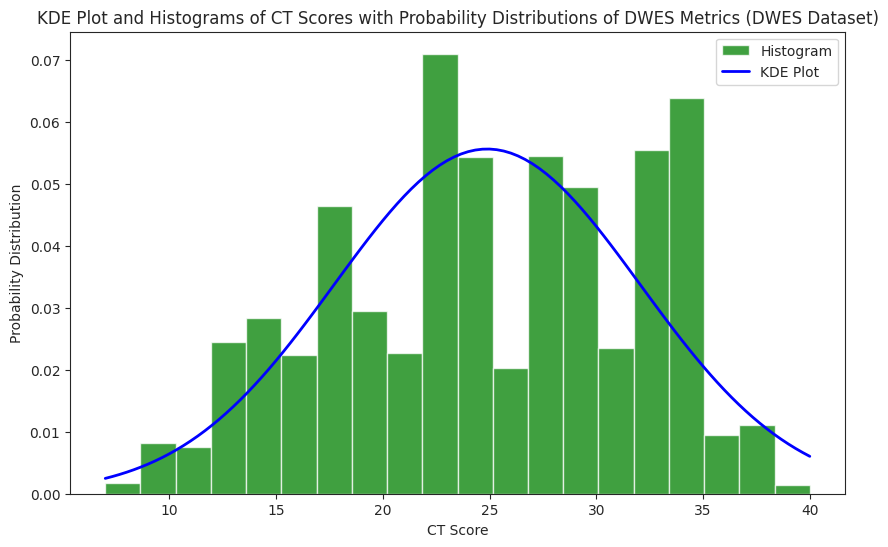

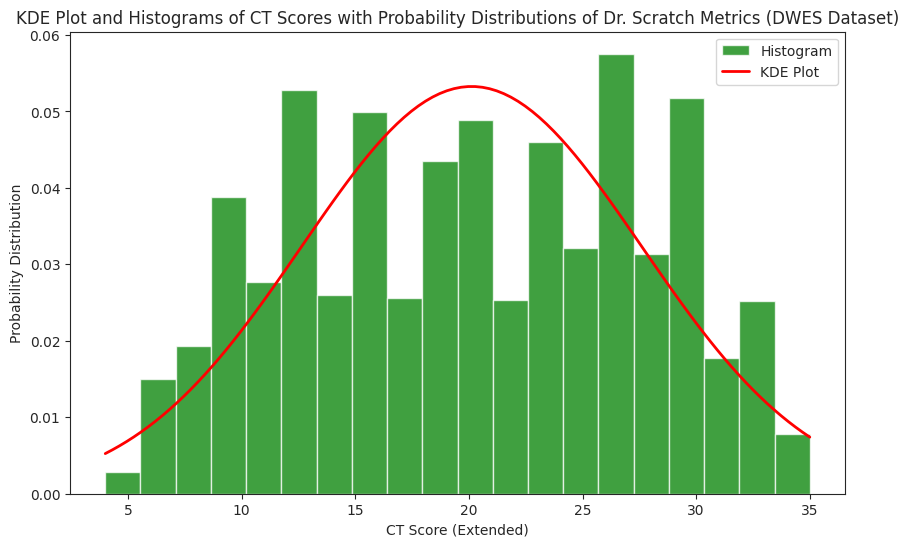

In [93]:

def graph_kde_dwes(df, title, color):
    dims_names = ['Abstraction', 'Parallelism', 'LogicalThinking', 'Synchronization', 
                  'FlowControl', 'UserInteractivity', 'DataRepresentation', 'CodeOrganization']
    df['points'] = sum(df[dim] for dim in dims_names)
    
    ct_score = df['points']
    
    # Gauss bell and save in a dataframe
    mean = ct_score.mean()
    std_dev = ct_score.std()
    min_score = ct_score.min()
    max_score = ct_score.max()
    x = np.linspace(min_score, max_score, 100)
    pdf = 1/(std_dev * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std_dev**2))
    
    
    plt.figure(figsize=(10, 6))
    
    # HISTOGRAM OF CT Score
    plt.hist(ct_score, density=True, color='green',bins=20, alpha=0.75, label='Histogram')
    
    # NORMAL DISTRIBUTION
    plt.plot(x, pdf, color=color, linewidth=2, label='KDE Plot')
    
    
    # DESIGN
    plt.title(f"KDE Plot and Histograms of CT Scores with Probability Distributions of {title} (DWES Dataset)")
    plt.xlabel('CT Score')
    plt.ylabel('Probability Distribution')
    plt.legend()
    
    
    plt.show()

def graph_kde_drscratch(df, title, color):
    df = pd.read_csv(cur_df)
    df['points'] = pd.to_numeric(df['points'], errors='coerce')
    ct_score = df['points']
    
    # Gauss bell and save in a dataframe
    mean = ct_score.mean()
    std_dev = ct_score.std()
    min_score = ct_score.min()
    max_score = ct_score.max()
    x = np.linspace(min_score, max_score, 100)
    pdf = 1/(std_dev * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std_dev**2))
    
    
    plt.figure(figsize=(10, 6))
    
    # HISTOGRAM OF CT Score
    plt.hist(ct_score, density=True, color='green',bins=20, alpha=0.75, label='Histogram')
    
    # NORMAL DISTRIBUTION
    plt.plot(x, pdf, color=color, linewidth=2, label='KDE Plot')
    
    
    # DESIGN
    plt.title(f"KDE Plot and Histograms of CT Scores with Probability Distributions of {title} (DWES Dataset)")
    plt.xlabel('CT Score (Extended)')
    plt.ylabel('Probability Distribution')
    plt.legend()
    
    
    plt.show()

graph_kde_dwes(df_dwes, "DWES Metrics", "blue")
graph_kde_drscratch(df_drscratch, "Dr. Scratch Metrics", "red")

## The code bellow is for **Heatmap** of each CT Concept and his frecuency in the SB3 Files

### Folder Name: **SB3 Files 1**

['Abstraction', 'Parallelism', 'LogicalThinking', 'Synchronization', 'FlowControl', 'UserInteractivity', 'DataRepresentation', 'CodeOrganization']


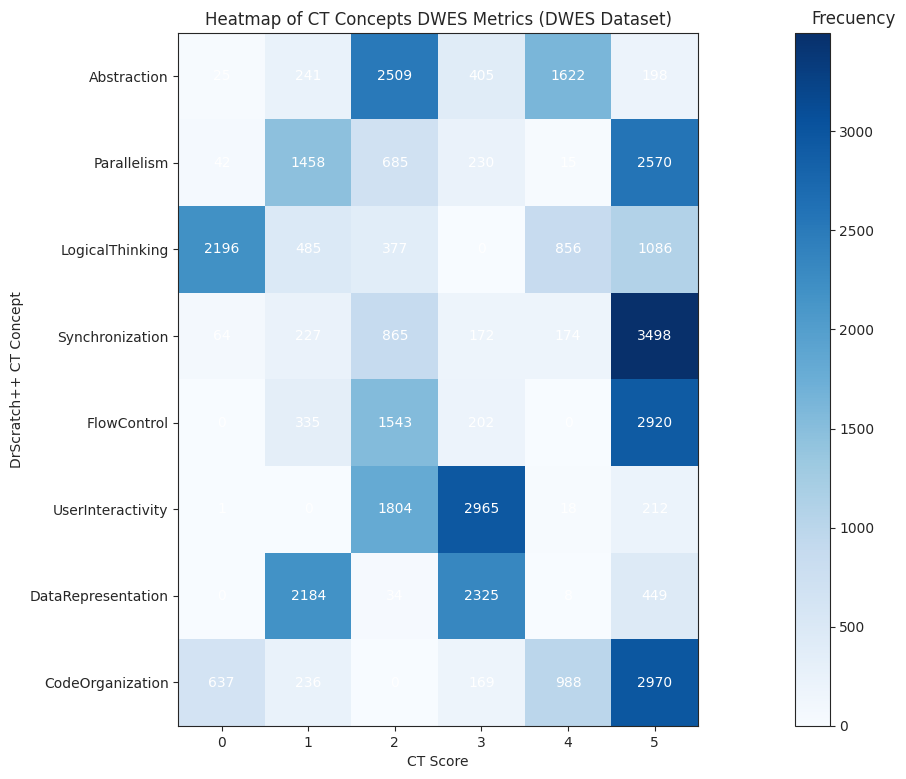

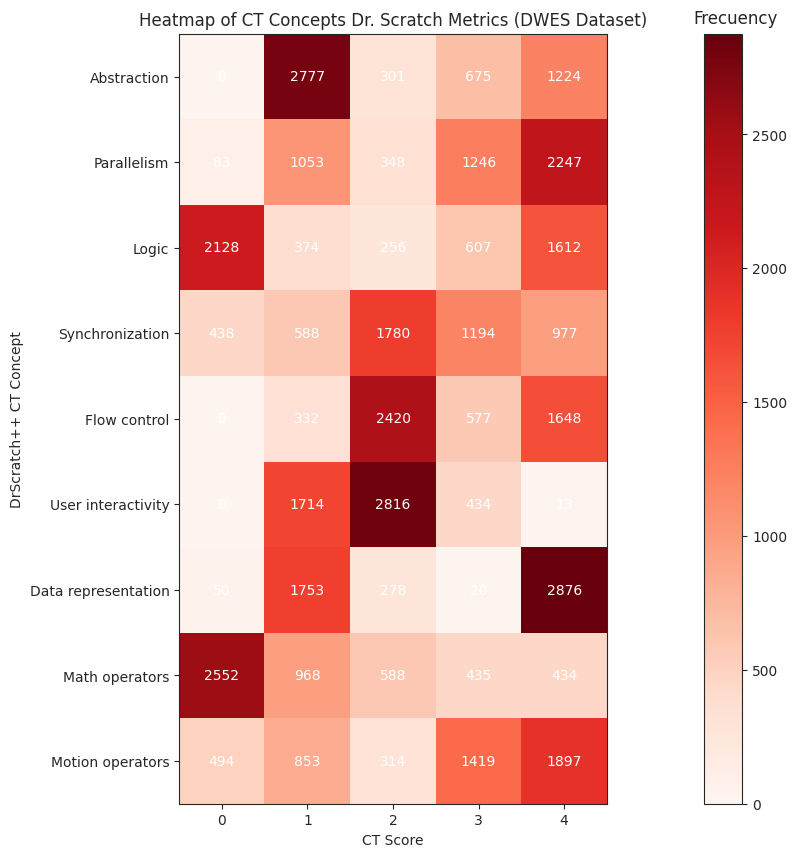

In [92]:
from collections import Counter

def graph_heatmap_dwes(df, title, color):  

    dims = df.iloc[:, 1:9]
    dims_names = dims.columns.tolist() 
    print(dims_names)
    # Convert text values to numeric, removing NaNs
    dim_means = dims.apply(lambda x: pd.to_numeric(x, errors='coerce')).mean()
    dim_means = [round(n, 2) for n in dim_means if pd.notna(n)]
    

    
    counter_list = [Counter(df[dim]) for dim in dims_names]
    max_value = 6
    matrix = np.zeros((len(dims_names), 6))
    for y, counter in enumerate(counter_list):
        for x in range(max_value):
            matrix[y, x]= counter.get(x, 0)
    
    # PLOT OF GRAPH
    plt.figure(figsize=(25, 9)) 
    plt.imshow(matrix, cmap=color, interpolation='nearest')
    plt.yticks([n for n in range(len(dims_names))], dims_names)
    plt.colorbar()
    
    # SHOW NUMERIC VALUE IN EACH HEATMAP CELL
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            val = int(matrix[i, j])
            plt.text(j, i, val, ha='center', va='center', color='white')
    
    # DESIGN
    plt.title(f'Heatmap of CT Concepts {title} (DWES Dataset)')
    plt.xlabel('CT Score')
    plt.ylabel('DrScratch++ CT Concept')
    plt.text(1.3, 1.02, 'Frecuency', fontsize=12, ha='center', va='center', rotation=0, transform=plt.gca().transAxes)
    
    
    plt.show()

def graph_heatmap_drscratch(df, title, color):  
    df = df.iloc[:,3:12]
    
    dims_names = df.columns[0:12].tolist()
    # CREATION OF FRECUENCY MATRIX
    
    for dim in dims_names:
        df[dim] = df[dim].apply(lambda x: x[0].split('/')[0]) 
    
    counter_list = [Counter(df[dim]) for dim in dims_names]
    max_value = 5
    matrix = np.zeros((len(dims_names), 5))
    for y, counter in enumerate(counter_list):
        for x in range(max_value):
            matrix[y, x]= counter.get(str(x), 0)
    
    # PLOT OF GRAPH
    plt.figure(figsize=(25, 10)) 
    plt.imshow(matrix, cmap=color, interpolation='nearest')
    plt.yticks([n for n in range(len(dims_names))], dims_names)
    plt.colorbar()
    
    # SHOW NUMERIC VALUE IN EACH HEATMAP CELL
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            val = int(matrix[i, j])
            plt.text(j, i, val, ha='center', va='center', color='white')
    
    # DESIGN
    plt.title(f'Heatmap of CT Concepts {title} (DWES Dataset)')
    plt.xlabel('CT Score')
    plt.ylabel('DrScratch++ CT Concept')
    plt.text(1.3, 1.02, 'Frecuency', fontsize=12, ha='center', va='center', rotation=0, transform=plt.gca().transAxes)
    
    
    plt.show()


graph_heatmap_dwes(df_dwes, "DWES Metrics", "Blues")
graph_heatmap_drscratch(df_drscratch, "Dr. Scratch Metrics", "Reds")

### Folder Name: **SB3 Files 4**